<a href="https://colab.research.google.com/github/Jaroslav789/Data_analysis_Colab/blob/main/Netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
# https://www.kaggle.com/datasets/rohitgrewal/netflix-data/data

df = pd.read_csv('/content/Netflix Dataset.csv')
display(data.head())

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [53]:
df.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


In [54]:
# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Handle missing values
df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Unknown")
df['Country'] = df['Country'].fillna("Unknown")
df['Release_Date'] = df['Release_Date'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Unknown")

# Clean genres (Type column)
# df['Genre_List'] = df['Type'].str.split(", ")

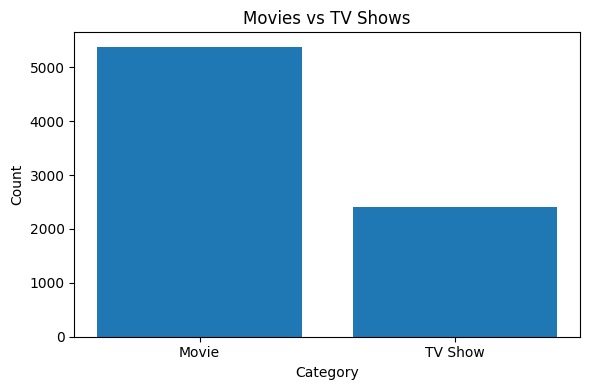

In [55]:
category_counts = df['Category'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(category_counts.index, category_counts.values)

plt.title("Movies vs TV Shows")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

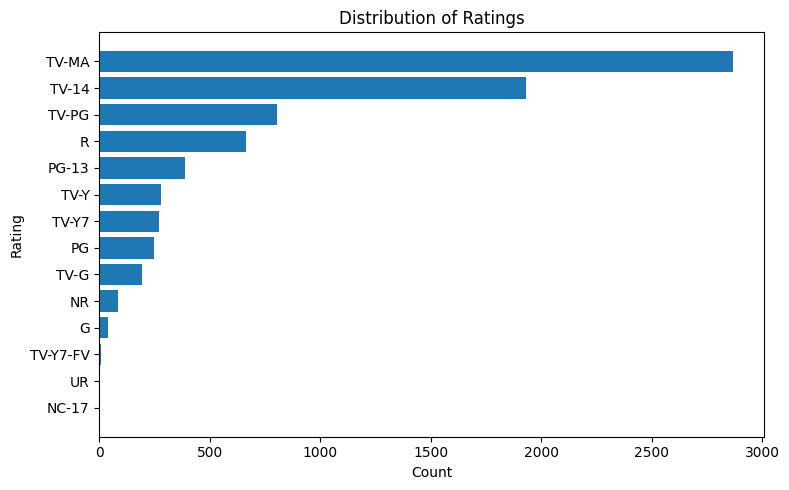

In [56]:
# vynechat hodnoty 'Unknown'
filtered = df[df['Rating'] != 'Unknown']

# četnosti + seřadit sestupně
rating_counts = filtered['Rating'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(8, 5))
plt.barh(rating_counts.index, rating_counts.values)

plt.title("Distribution of Ratings")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

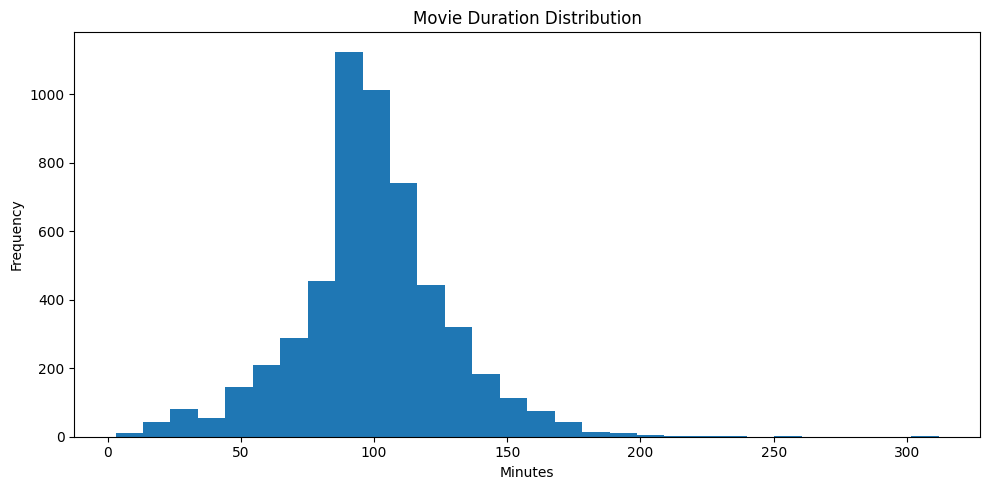

In [57]:
# vybrat jen filmy
movies = df[df['Category'] == "Movie"].copy()

# extrahovat číslo
movies['Minutes'] = movies['Duration'].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(10, 5))
plt.hist(movies['Minutes'], bins=30)

plt.title("Movie Duration Distribution")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [58]:
# vynechat 'Unknown' a NaN, rozdělit více režisérů a explodovat
df_directors = df[df['Director'] != 'Unknown']['Director'].dropna().str.split(', ').explode()

df_directors.value_counts().head(20)

,count
Director,
Jan Suter,21
Raúl Campos,19
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Jay Chapman,12
Youssef Chahine,12
Martin Scorsese,12
Steven Spielberg,10


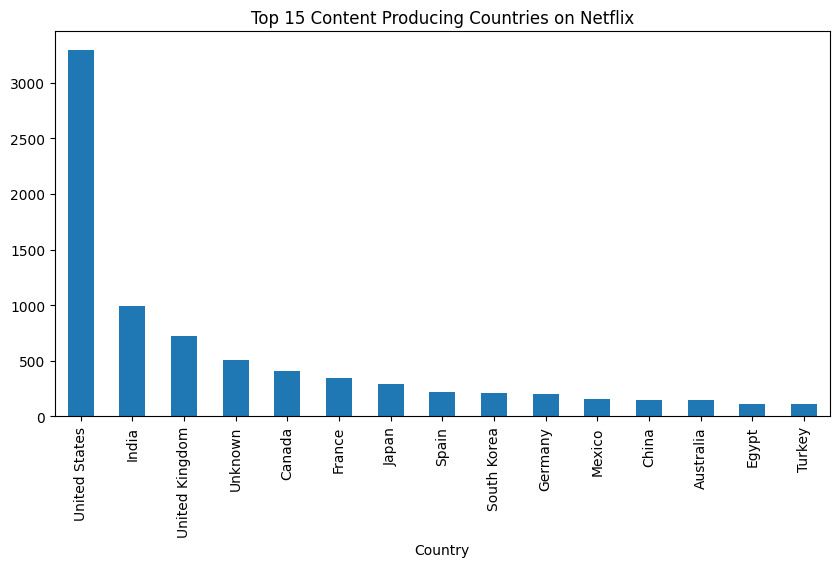

In [59]:
from collections import Counter

country_data = df['Country'].dropna().str.split(', ')
country_data = country_data.explode()

top_countries = country_data.value_counts().head(15)

plt.figure(figsize=(10,5))
top_countries.plot(kind='bar')
plt.title("Top 15 Content Producing Countries on Netflix")
plt.xticks(rotation=90)
plt.show()